{'MSE (Train)': 0.01034, 'R^2 (Train)': 0.85217, 'MSE (Test)': 0.02953, 'R^2 (Test)': 0.5003, 'RMSE (Train)': 0.10167, 'RMSE (Test)': 0.17185}


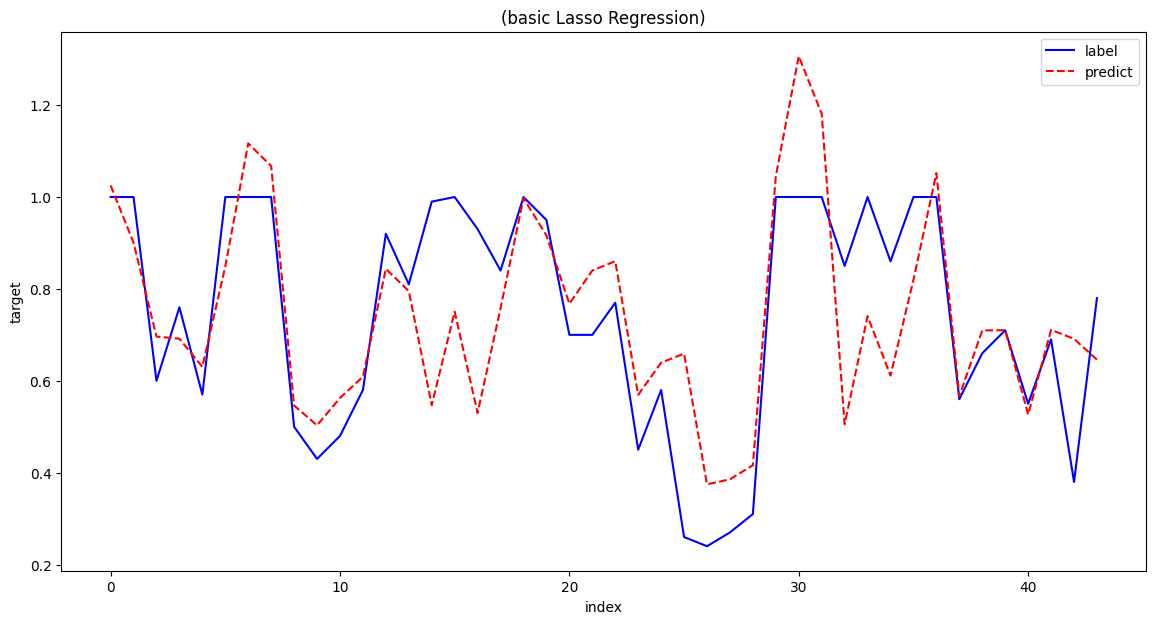

In [95]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load data
train_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_train.csv")
test_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_test.csv")


# Separate features and target
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

'''
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top features
select = SelectKBest(f_classif, k=25)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)
'''
# Train Lasso model with cross-validation
lasso = LassoCV(cv = 3, random_state=42)
lasso.fit(X_train, y_train)

# Predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Performance evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5


lasso_results = {
    "MSE (Train)": round(mse_train, 5),
    "R^2 (Train)": round(r2_train, 5),
    "MSE (Test)": round(mse_test, 5),
    "R^2 (Test)": round(r2_test, 5),
    "RMSE (Train)": round(rmse_train, 5),
    "RMSE (Test)": round(rmse_test, 5),
}

print(lasso_results)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='label', color='b')
plt.plot(y_pred_test, label='predict', color='r', linestyle='--')
plt.title('(basic Lasso Regression)')
plt.xlabel('index')
plt.ylabel('target')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\envs\notebook6.0.3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Best parameters: {'alpha': 0.001}
{'MSE (Train)': 0.01347, 'R^2 (Train)': 0.80742, 'MSE (Test)': 0.02087, 'R^2 (Test)': 0.64689, 'RMSE (Train)': 0.11605, 'RMSE (Test)': 0.14446}


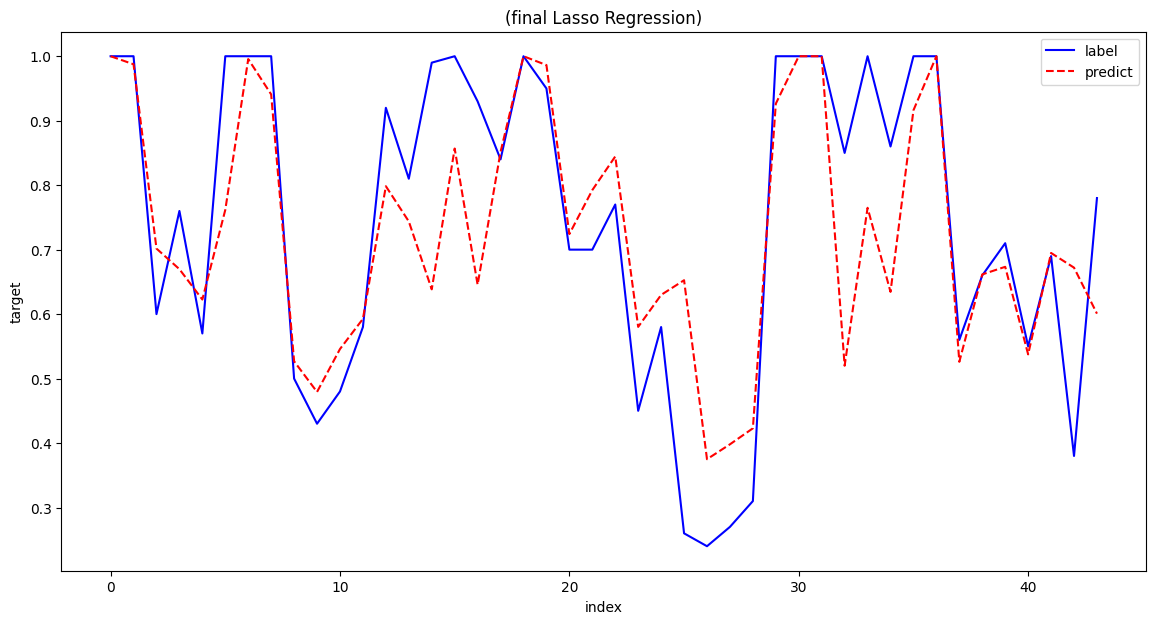

In [140]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load data
train_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_train.csv")
test_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_test.csv")


# 종속 변수와 독립 변수 분리
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 특징 선택 (ANOVA F-스코어 사용)
select = SelectKBest(f_classif, k=25)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000]
}

# GridSearchCV를 사용하여 하이퍼파라미터 최적화
lasso = Lasso(random_state=42)
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

# 최적 모델로 예측
best_lasso = grid_search.best_estimator_

# 예측
y_pred_train = best_lasso.predict(X_train_selected)
y_pred_test = best_lasso.predict(X_test_selected)

# Adjust predictions to not exceed 1
y_pred_train = [min(1, pred) for pred in y_pred_train]
y_pred_test = [min(1, pred) for pred in y_pred_test]

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

lasso_results = {
    "MSE (Train)": round(mse_train, 5),
    "R^2 (Train)": round(r2_train, 5),
    "MSE (Test)": round(mse_test, 5),
    "R^2 (Test)": round(r2_test, 5),
    "RMSE (Train)": round(rmse_train, 5),
    "RMSE (Test)": round(rmse_test, 5),
}

print(lasso_results)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='label', color='b')
plt.plot(y_pred_test, label='predict', color='r', linestyle='--')
plt.title('(final Lasso Regression)')
plt.xlabel('index')
plt.ylabel('target')
plt.legend()
plt.show()

{'MSE (Train)': 0.01016, 'R^2 (Train)': 0.85467, 'RMSE (Train)': 0.10081, 'MSE (Test)': 0.02979, 'R^2 (Test)': 0.49595, 'RMSE (Test)': 0.17259}


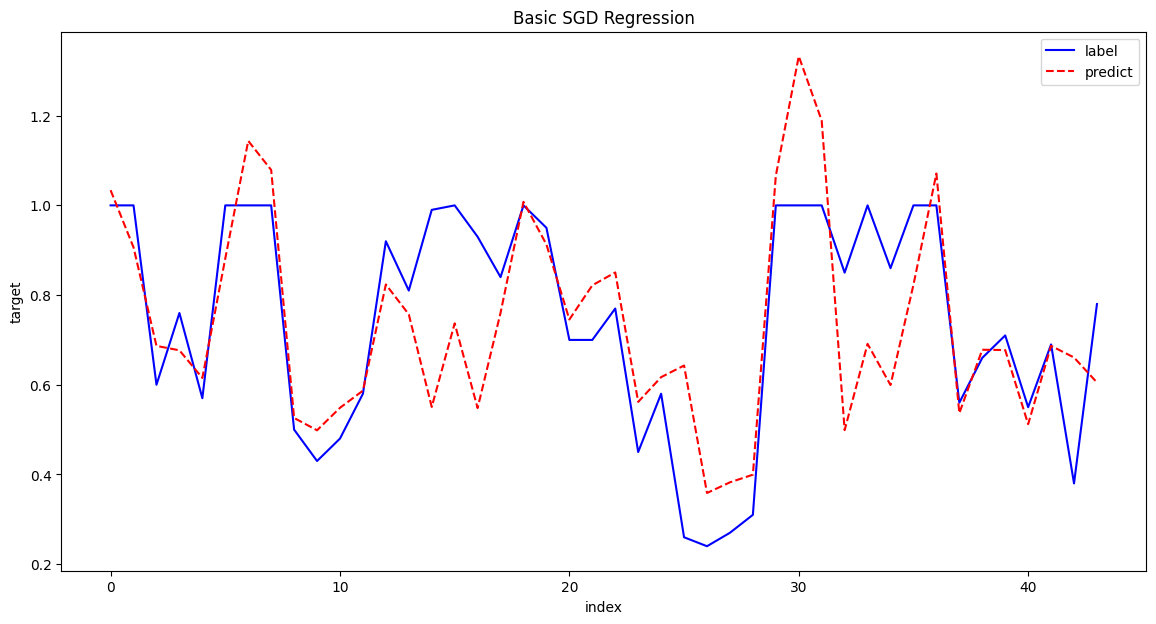

In [135]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로드
train_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_train.csv")
test_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_test.csv")

# 피처와 타겟 분리
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 정의 및 학습
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train_scaled, y_train)

# 예측
y_pred_train = sgd.predict(X_train_scaled)
y_pred_test = sgd.predict(X_test_scaled)

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

sgd_results = {
    "MSE (Train)": round(mse_train, 5),
    "R^2 (Train)": round(r2_train, 5),
    "RMSE (Train)": round(rmse_train, 5),
    "MSE (Test)": round(mse_test, 5),
    "R^2 (Test)": round(r2_test, 5),
    "RMSE (Test)": round(rmse_test, 5),
}
print(sgd_results)


# Plot
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='label', color='b')
plt.plot(y_pred_test, label='predict', color='r', linestyle='--')
plt.title('Basic SGD Regression')
plt.xlabel('index')
plt.ylabel('target')
plt.legend()
plt.show()


C:\ProgramData\anaconda3\envs\notebook6.0.3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


교차 검증 MSE: [0.01065112 0.01212449 0.02878377 0.01404093 0.01812369]
교차 검증 R^2: [0.8645294  0.81352945 0.62864053 0.77548166 0.69867609]
평균 교차 검증 MSE: 0.016744799432447652
평균 교차 검증 R^2: 0.7561714256886056
{'MSE (Train)': 0.01369, 'R^2 (Train)': 0.80417, 'RMSE (Train)': 0.11702, 'MSE (Test)': 0.02268, 'R^2 (Test)': 0.61616, 'RMSE (Test)': 0.15061}


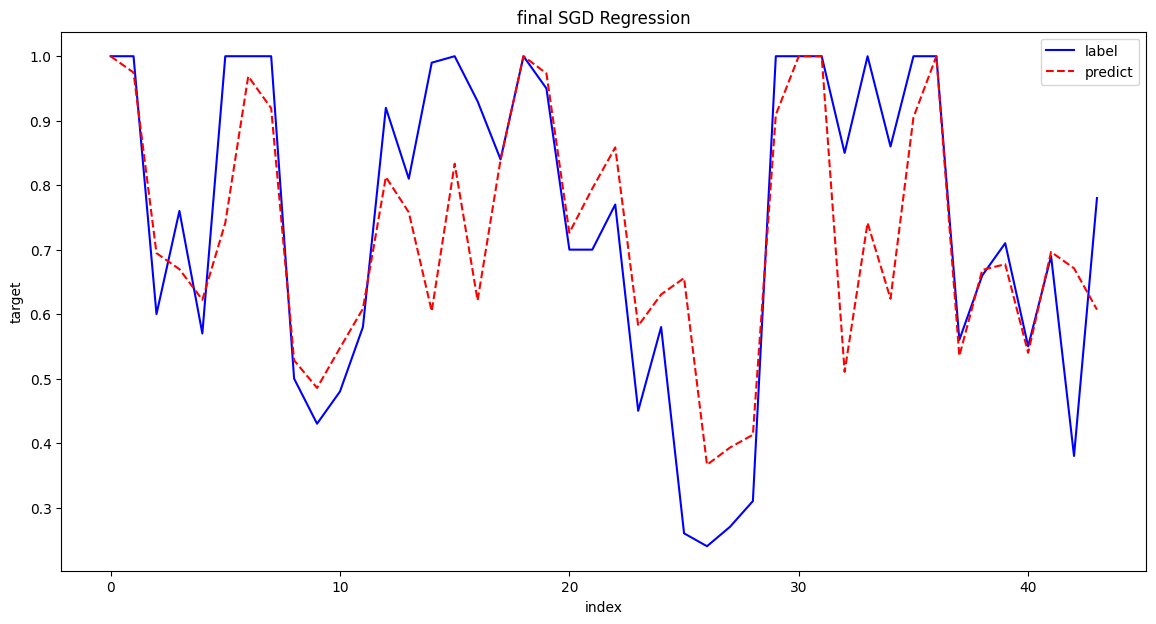

In [143]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# 데이터 로드
train_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_train.csv")
test_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_test.csv")

# 피처와 타겟 분리
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 상위 피처 선택
select = SelectKBest(f_classif, k=25)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

# 모델 정의
sgd = SGDRegressor(random_state=42)

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_mse = cross_val_score(sgd, X_train_selected, y_train, cv=kf, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(sgd, X_train_selected, y_train, cv=kf, scoring='r2')

print("교차 검증 MSE:", -cross_val_mse)
print("교차 검증 R^2:", cross_val_r2)
print("평균 교차 검증 MSE:", -cross_val_mse.mean())
print("평균 교차 검증 R^2:", cross_val_r2.mean())

# 최종 모델 학습
sgd.fit(X_train_selected, y_train)

# 예측
y_pred_train = sgd.predict(X_train_selected)
y_pred_test = sgd.predict(X_test_selected)

# Adjust predictions to not exceed 1
y_pred_train = [min(1, pred) for pred in y_pred_train]
y_pred_test = [min(1, pred) for pred in y_pred_test]

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

sgd_results = {
    "MSE (Train)": round(mse_train, 5),
    "R^2 (Train)": round(r2_train, 5),
    "RMSE (Train)": round(rmse_train, 5),
    "MSE (Test)": round(mse_test, 5),
    "R^2 (Test)": round(r2_test, 5),
    "RMSE (Test)": round(rmse_test, 5),
}
print(sgd_results)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='label', color='b')
plt.plot(y_pred_test, label='predict', color='r', linestyle='--')
plt.title('final SGD Regression')
plt.xlabel('index')
plt.ylabel('target')
plt.legend()
plt.show()

{'MSE (Train)': 0.01469, 'R^2 (Train)': 0.78997, 'RMSE (Train)': 0.12119, 'MSE (Test)': 0.03784, 'R^2 (Test)': 0.35968, 'RMSE (Test)': 0.19453}


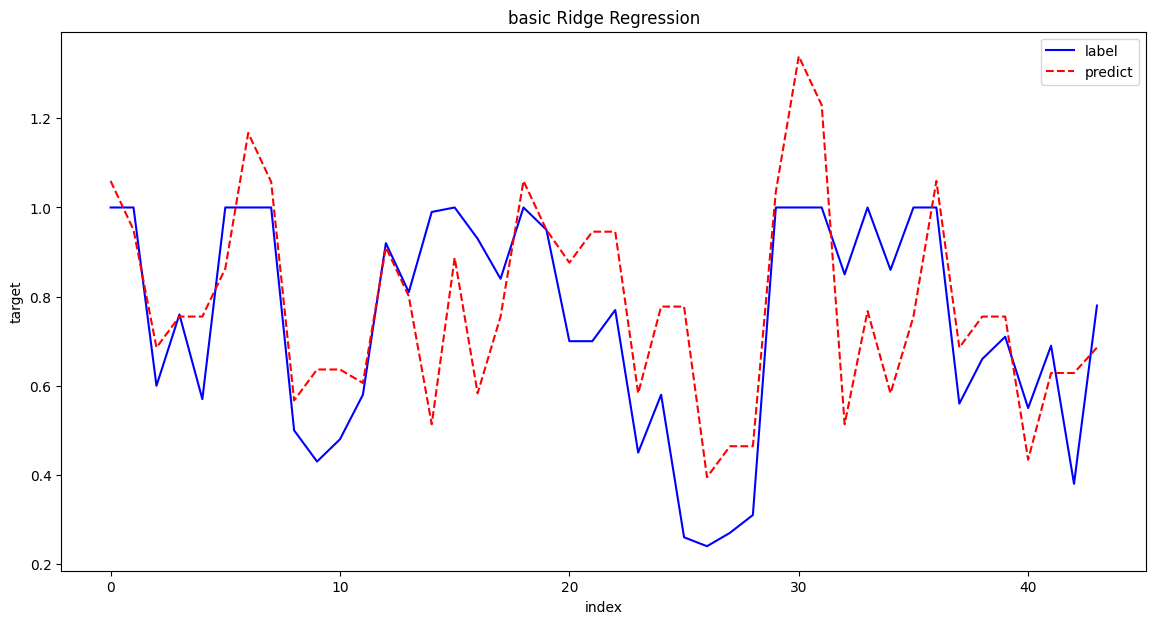

In [7]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 로드
train_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_train.csv")
test_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_test.csv")

# 종속 변수와 독립 변수 분리
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 회귀 모델 사용
estimator = Ridge(alpha=1.0)  # 모델 선언

# RFE를 사용하여 특징 선택
select = RFE(estimator, n_features_to_select=10, step=1)
select.fit(X_train_scaled, y_train)

X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

# Ridge 회귀 모델 학습 (교차 검증을 통한 하이퍼파라미터 최적화)
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_selected, y_train)

# 예측
y_pred_train = ridge.predict(X_train_selected)
y_pred_test = ridge.predict(X_test_selected)

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

ridge_results = {
    "MSE (Train)": round(mse_train, 5),
    "R^2 (Train)": round(r2_train, 5),
    "RMSE (Train)": round(rmse_train, 5),
    "MSE (Test)": round(mse_test, 5),
    "R^2 (Test)": round(r2_test, 5),
    "RMSE (Test)": round(rmse_test, 5),
}

print(ridge_results)


# Plot
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='label', color='b')
plt.plot(y_pred_test, label='predict', color='r', linestyle='--')
plt.title('basic Ridge Regression')
plt.xlabel('index')
plt.ylabel('target')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\envs\notebook6.0.3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


최적의 알파 값: 10.0
{'MSE (Train)': 0.01355, 'R^2 (Train)': 0.80618, 'RMSE (Train)': 0.11642, 'MSE (Test)': 0.022, 'R^2 (Test)': 0.62773, 'RMSE (Test)': 0.14832}


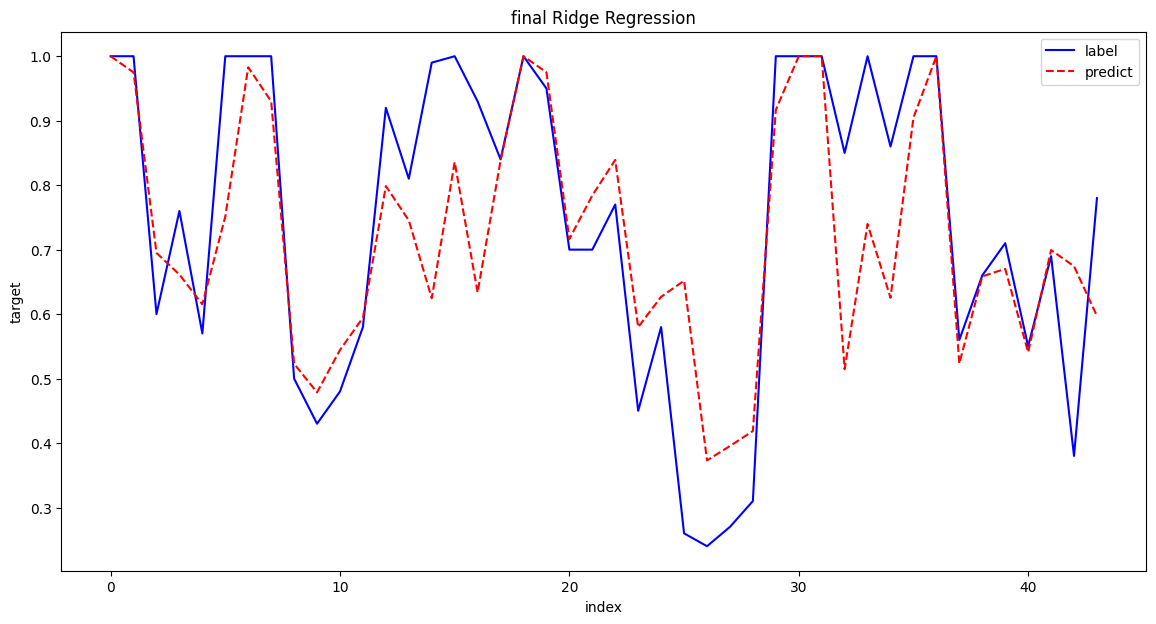

In [6]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# 데이터 로드
train_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_train.csv")
test_data = pd.read_csv("C:/Users/Administrator/Desktop/real_final_test.csv")

# 종속 변수와 독립 변수 분리
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 특징 선택 (ANOVA F-스코어 사용)
select = SelectKBest(f_classif, k=25)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

# Ridge 회귀 모델 학습 (교차 검증을 통한 하이퍼파라미터 최적화)
ridge = RidgeCV(alphas=[0.001,0.01,0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_selected, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 알파 값:", ridge.alpha_)

# 예측
y_pred_train = ridge.predict(X_train_selected)
y_pred_test = ridge.predict(X_test_selected)

# 예측값 조정
y_pred_train = [min(1, pred) for pred in y_pred_train]
y_pred_test = [min(1, pred) for pred in y_pred_test]

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

ridge_results = {
    "MSE (Train)": round(mse_train, 5),
    "R^2 (Train)": round(r2_train, 5),
    "RMSE (Train)": round(rmse_train, 5),
    "MSE (Test)": round(mse_test, 5),
    "R^2 (Test)": round(r2_test, 5),
    "RMSE (Test)": round(rmse_test, 5),
}

print(ridge_results)


# Plot
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='label', color='b')
plt.plot(y_pred_test, label='predict', color='r', linestyle='--')
plt.title('final Ridge Regression')
plt.xlabel('index')
plt.ylabel('target')
plt.legend()
plt.show()
